In [2]:
import os

base_dir = './cats_and_dogs_filtered/cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'validation', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [3]:
import os
from glob import glob

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index+=8

<Figure size 1152x1152 with 0 Axes>

In [17]:
next_cat_pix =glob(os.path.join(train_cats_dir, "*.jpg"))[pic_index-8:pic_index]
next_dog_pix =glob(os.path.join(train_dogs_dir, "*.jpg"))[pic_index-8:pic_index]

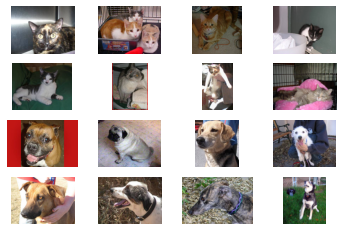

In [18]:
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch to get to ~72% Accuracy

In [35]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from keras.models import Model, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

In [36]:
inputs = Input(shape=(150, 150, 3))
x = Rescaling(1/255)(inputs)
x = Conv2D(16, (3,3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(54, (3,3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 148, 148, 54)      1512      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 54)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 295704)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               151400960 
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                           

In [37]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

## Data Preprocessing

In [38]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [39]:
train_data = image_dataset_from_directory(train_dir, image_size=(150, 150), batch_size=20)
val_data = image_dataset_from_directory(validation_dir, image_size=(150, 150), batch_size=20)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [40]:
history = model.fit(train_data, epochs=15, validation_data= val_data, verbose=1)

Epoch 1/15
100/100 [==============================] - 89s 882ms/step - loss: 808.1092 - accuracy: 0.5440 - val_loss: 7.7733 - val_accuracy: 0.5510
Epoch 2/15
100/100 [==============================] - 88s 884ms/step - loss: 2.2822 - accuracy: 0.7430 - val_loss: 1.4037 - val_accuracy: 0.6000
Epoch 3/15
100/100 [==============================] - 88s 880ms/step - loss: 0.3687 - accuracy: 0.9030 - val_loss: 2.2977 - val_accuracy: 0.5890
Epoch 4/15
100/100 [==============================] - 88s 883ms/step - loss: 0.3937 - accuracy: 0.9495 - val_loss: 3.7530 - val_accuracy: 0.6400
Epoch 5/15
100/100 [==============================] - 84s 842ms/step - loss: 0.1464 - accuracy: 0.9760 - val_loss: 4.0197 - val_accuracy: 0.6240
Epoch 6/15
100/100 [==============================] - 84s 837ms/step - loss: 0.6379 - accuracy: 0.9655 - val_loss: 4.0189 - val_accuracy: 0.6190
Epoch 7/15
100/100 [==============================] - 84s 842ms/step - loss: 0.5361 - accuracy: 0.9745 - val_loss: 5.2924 - val_

## Model Prediction

In [46]:
test_imgs = glob(os.path.join(validation_cats_dir, "*.jpg")) + glob( os.path.join(train_dogs_dir, "*.jpg"))

In [53]:
import random
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test_img = random.choice(test_imgs)
img = load_img(test_img, target_size=(150, 150))
img = img_to_array(img)
img=np.expand_dims(img, axis=0)
images = np.vstack([img])
classes = model.predict(images, batch_size=10)
print(classes[0])
fn = os.path.basename(test_img)
if classes[0]>0.5:
  print(fn + " is a dog")
else:
  print(fn + " is a cat")

[1.]
dog.22.jpg is a dog


In [54]:
acc = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

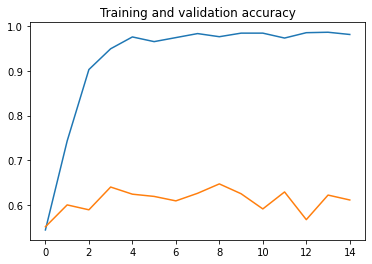

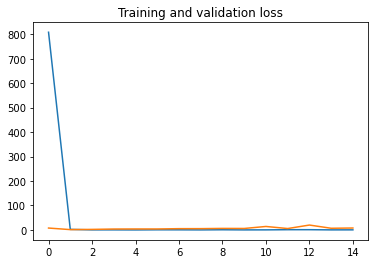

In [55]:
epochs   = range(len(acc))
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')
